<a href="https://colab.research.google.com/github/shannuvision/flipkartgrid/blob/main/FlipkartGrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing **Libraries**

In [ ]:
!pip install opencv-python matplotlib cvlib

In [ ]:
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,884 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
!pip install tensorflow

In [ ]:
!pip install opencv-python

In [ ]:
!pip install cvlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 85.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046369 sha256=a19b401ebc433f622f548d4bc9f6d953ac7514e512366fb9a1afd441f9147437
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12066 sha256=02e718cfddccd6ace2e5f0efabcc640b7e30611720e6ec0bf0b892238fdb4552
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built cvlib progressbar


In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 16.6 MB/s eta 0:00:00


In [ ]:
!pip install opencv-python pytesseract matplotlib

Importing Libraries

In [ ]:
import cv2
import cvlib as cv
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
import easyocr
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from cvlib.object_detection import draw_bbox
from numpy.lib.polynomial import poly
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16

 Create an EasyOCR reader instance for English language.
 This initializes the OCR (Optical Character Recognition) model

In [ ]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Load the image from the specified path

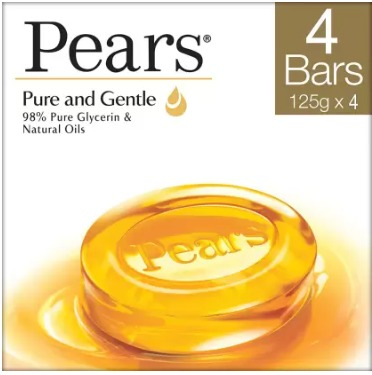

In [ ]:
# Image("/Image3.jpeg")
# Image("/image2.jpeg")
# Image("/image1.jpeg")
# Image("/image4.jpeg")
# Image("/image5.jpeg")
# Image("/image6.jpg")
# Image("/image7.jpeg")
# Image("/sham.jpeg")
Image("/pearsyellow.jpeg")
# Image("/pearsgreen.jpeg")
# Image("/pearsBlue.jpeg")


Perform OCR on the image at the specified path and store the results in 'output1'

In [ ]:
# output1 = reader.readtext('/Image3.jpeg')
# output1 = reader.readtext('/image2.jpeg')
# output1 = reader.readtext('/image1.jpeg')
# output1 = reader.readtext('/image4.jpeg')
# output1 = reader.readtext('/image5.jpeg')
# output1 = reader.readtext('/image6.jpg')
# output1 = reader.readtext('/image7.jpeg')
# output1 = reader.readtext('/sham.jpeg')
output1 = reader.readtext('/pearsyellow.jpeg')
# output1 = reader.readtext('/pearsgreen.jpeg')
# output1 = reader.readtext('/pearsBlue.jpeg')

Create a list of recognized text (second element) from each result in 'output1'

In [ ]:
extracted1 = [results[1] for results in output1]

Combine the extracted text items into a single string, separated by spaces

In [ ]:
final_text1 = " ".join(extracted1)

Output the combined extracted text to the console with a label

In [ ]:
print("Extracted Text:", final_text1)

Extracted Text: 4 Pears Bars Pure and Gentle 125gx4 98%0 Pure Glycerin Natural Oils Bal


Load the image from the specified path.

Convert the image to grayscale for processing.

Apply thresholding to create a binary image.

Find contours in the binary image.

Count the number of non-zero contours detected.

Return the count of detected products.

In [ ]:
def count_products(image_path):
    # Load image
    img = cv2.imread('/Image3.jpeg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Count non-zero contours
    count = len(contours)

    return count


The main function takes an image_path as input to perform two tasks: it prints the extracted text stored in final_text1 and counts the number of products in the image using the count_products function.

The product count is then printed to the console. An example usage sets image_path to '/Image3.jpeg' to demonstrate how to call the main function.

In [ ]:
def main(image_path):
    # Extract text from image
    print("Extracted Text:", final_text1)

    # Count the number of products
    product_count = count_products(image_path)
    print("Number of Products Detected:", product_count)
# Example usage:
image_path = '/Image3.jpeg'  # Provide your image path here
main(image_path)


Extracted Text: Cadbuy Dairy Milk CHOCOLATE
Number of Products Detected: 1


To display the image

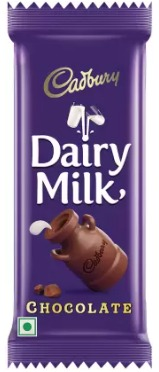

In [ ]:
Image("/Image3.jpeg")

Import the PIL library for image processing, aliasing Image as PILImage.

List of image paths to be processed.

In [ ]:
from PIL import Image as PILImage

image_paths = [
    "/Image3.jpeg",
    "/image2.jpeg",
    "/image1.jpeg",
    "/image4.jpeg",
    "/image5.jpeg",
    "/image6.jpg",
    "/image7.jpeg",
    "/sham.jpeg",
    "/pearsyellow.jpeg",
    "/pearsgreen.jpeg",
    "/pearsBlue.jpeg"
]

Initialize an empty list to store extracted text from images.

Initialize an empty list to store image objects or paths.

In [ ]:
extracted_text = []
images = []

Read the image and perform OCR to extract text.

Extract the recognized text and append it to the 'extracted_text' list.

Load the image using PIL for potential display or processing.

Add the loaded image to the 'images' list.

In [ ]:
for path in image_paths:
    # Read the image and extract text
    output = reader.readtext(path)

    # Extract the text from the output
    extracted_text += [result[1] for result in output]

    # Load the image for display
    img = PILImage.open(path)
    images.append(img)


Combine all extracted text items into a single string, separated by newlines.

In [ ]:
final_text = "\n".join(extracted_text)


Output the combined extracted text to the console with a newline for formatting.

In [ ]:
print("Extracted Text:\n",final_text)


Extracted Text:
 Cadbuy
Dairy
Milk
CHOCOLATE
S PRINKLER
Pink Rock Salt
Catch'
Catch
POWDER
JEERA
TATA
sampann
HIGH IN FIBRE
Poha(Thick)
500 g
Colgate
Toothpaste
VISIBL E
WHITE
OXYGENATED
WHITENING
STARTS WHITENING
IN 3 DAYS^
s0g
Goore
CINTHOL
LIME
Refreshing deo soap
Vaseline
pure skin jelly "
original 
heade
shoulders
CLASSIC
CLEAN
DANDRUFF
SHAMPOO
4
Pears
Bars
Pure and Gentle
125gx4
98%0 Pure Glycerin
Natural Oils
Bal
75g
Pears
Oil-Clear & Glow
98%0 Pure Glycerin
Lemon Flower Extracts
Look Young
Stay Young
Pears
Soft and Fresh
98% Pure Glycerin &
Mint Extracts
Look
Bathing Bar
Young
Stay
Young
Peal
